## Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting wheather or not someone has heart disease based on their medical attributes.


We're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluaion
4. Features
5. Modelling
6. Experimentation

## 1.Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict wheather or not they have heart disease?

## 2.Data 

The original data came from the cleavlad data from UCI machine learning repository.
https://archive-beta.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available in Kaggle.https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

## 3.Evaluation

>If we can reach 95% accuracy in predicting wheather or not a patient has heart diease during the proof of concept , we'll persue the project. 

## 4.Features

This is where you will get different information about each of the features in the data.

**Create data dictionary**

 1. age: age in years
 2. sex: sex (1 = male; 0 = female)
 3. cp: chest pain type
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic
 4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
 5. chol: serum cholestoral in mg/dl
 6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
 7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
 8. thalach: maximum heart rate achieved
 9. exang: exercise induced angina (1 = yes; 0 = no)
 10. oldpeak = ST depression induced by exercise relative to rest
 11. slope: the slope of the peak exercise ST segment
     * Value 0: upsloping
     * Value 1: flat
     * Value 2: downsloping
 12. ca: number of major vessels (0-3) colored by flourosopy
 13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect.

## Preparing the tools

We're going to use pandas,numpy and matplotlib for data analysis and manipulation.

In [1]:
#import all the tools we need

#Regular EDA (exploratory data analysis) and plotting libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plot to appear inside our notebook
%matplotlib inline

#sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
df=pd.read_csv("heart.csv")
df.shape #rows,col

(297, 14)

## Data exploration (Exploratory data analysis)

The goal here is to find out more about our data and become a subject matter expert on the dataset you're working with

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from our data and how do you deal with it?
4. What are the outliers and why should you care about them?
5. How can u add change and remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
df.condition.value_counts()

0    160
1    137
Name: condition, dtype: int64

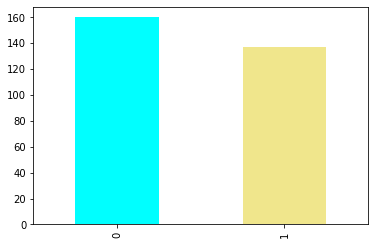

In [5]:
df.condition.value_counts().plot(kind="bar",color=["aqua","khaki"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [7]:
#Are there any missing values
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


## Heart Disease frequency according to sex

In [9]:
df.sex.value_counts()

1    201
0     96
Name: sex, dtype: int64

In [10]:
#compare sex column with condition column
pd.crosstab(df.sex,df.condition)

condition,0,1
sex,,
0,71,25
1,89,112


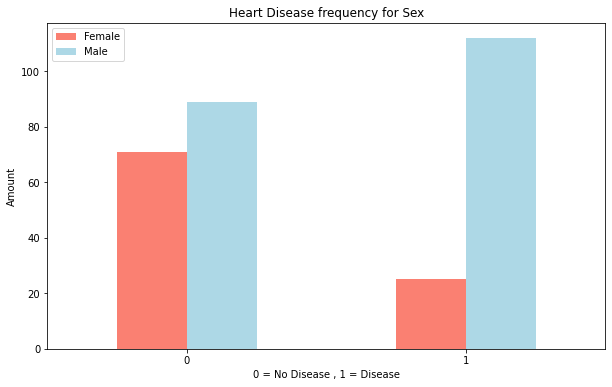

In [11]:
#create a plot of crosstab
pd.crosstab(df.condition,df.sex).plot(kind='bar',
                                     figsize=(10,6),
                                     color=['salmon','lightblue']);
plt.title("Heart Disease frequency for Sex")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

## Age vs thalach(max Heart rate) for heart disease

In [12]:
df.thalach.value_counts()

162    11
163     9
160     9
152     8
172     7
       ..
192     1
202     1
167     1
97      1
195     1
Name: thalach, Length: 91, dtype: int64

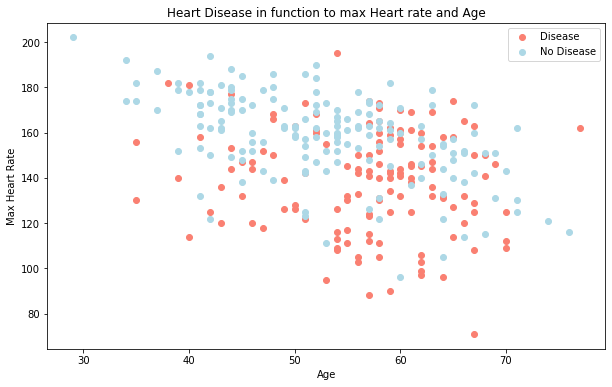

In [13]:
#Create another figure
plt.figure(figsize=(10,6))

#scatter plot for positive values
plt.scatter(df.age[df.condition==1],
           df.thalach[df.condition==1],
           color="salmon");

#scatter plot for negative values
plt.scatter(df.age[df.condition==0],
           df.thalach[df.condition==0],
           color="lightblue");

plt.title("Heart Disease in function to max Heart rate and Age")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

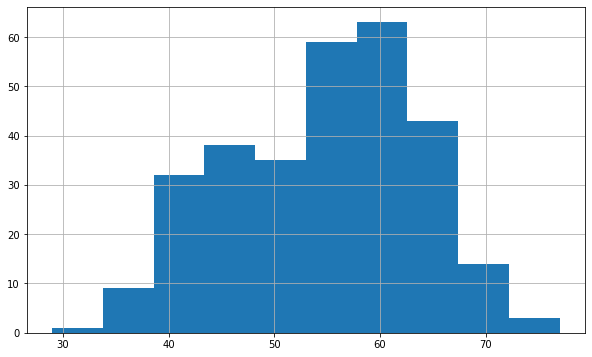

In [14]:
#Check the distribution of age column with histogram
df.age.hist(figsize=(10,6));

## Heart Disease frequency per chest pain

3. cp: chest pain type
   * Value 0: typical angina
   * Value 1: atypical angina
   * Value 2: non-anginal pain
   * Value 3: asymptomatic


In [15]:
pd.crosstab(df.cp , df.condition)

condition,0,1
cp,,
0,16,7
1,40,9
2,65,18
3,39,103


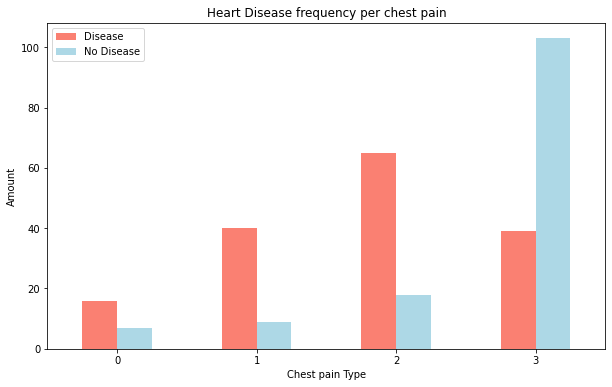

In [16]:
#Make crosstab more visual
pd.crosstab(df.cp,df.condition).plot(kind='bar',
                                    figsize=(10,6),
                                    color=['salmon','lightblue']);

plt.title("Heart Disease frequency per chest pain")
plt.xlabel("Chest pain Type")
plt.ylabel("Amount")
plt.legend(["Disease","No Disease"]);
plt.xticks(rotation=0);

In [17]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


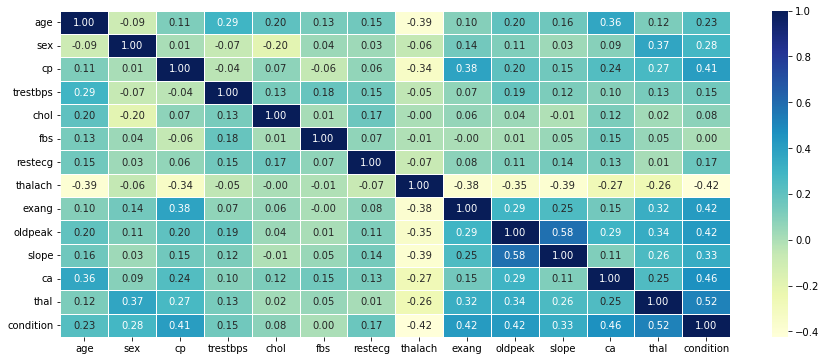

In [18]:
#Let's make our correlation matrix a more prettier
corr_matrix=df.corr()
fig , ax = plt.subplots(figsize=(15,6))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

## 5.Modelling

In [3]:
#Split data into x & y
x=df.drop("condition",axis=1)
y=df["condition"]

In [4]:
#Split data into train and test set
np.random.seed(42)

x_train,x_test,y_train,y_test=train_test_split(x,
                                              y,
                                              test_size=0.2)

Now we got our data split into training and test set,it's time to build a machine learning model

We'll train (find the patterns) it on the training sets.

We'll test (use the patterns) it on our test set.

We're going to try 3 different models
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [21]:
#Put the models in the dictionary
models = {"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}

#Create a functon to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different scikit-learn machine learning models
    x_train :training data(no labels)
    x_test ; testing data (no labels)
    y_train : training labels
    y_test : test labels
    
    """
    #set a random seed
    np.random.seed(42)
    #make a dict to keep model scores
    model_scores={}
    #loop through models 
    for name,model in models.items():
        #fit the model
        model.fit(x_train,y_train)
        #evaluate the model and apped its score to model_scores
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [22]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

/home/sai_sharan/Desktop/heart-disease-project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7333333333333333,
 'KNN': 0.5666666666666667,
 'Random Forest': 0.7}

## Model Comparision

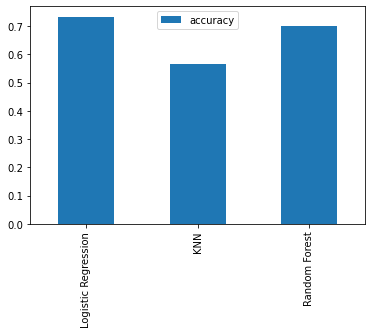

In [23]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should baseed our next steps off.
what should we do?

Let's look at the folowing:
* Hyperparameter tunning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC Curve
* Area under curve (AUC)


## Hyperparameter tuning

In [24]:
#Let's tune KNN

train_scores = []
test_scores = []
        
#Create a list of different values for n_neighbors
neighbors=range(1,21)

#Setup KNN instance
knn = KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(x_train,y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    
    #Update the test scores
    test_scores.append(knn.score(x_test,y_test))

In [25]:
train_scores

[1.0,
 0.7974683544303798,
 0.8016877637130801,
 0.7890295358649789,
 0.7763713080168776,
 0.7679324894514767,
 0.7679324894514767,
 0.7637130801687764,
 0.7383966244725738,
 0.7257383966244726,
 0.7257383966244726,
 0.7257383966244726,
 0.7257383966244726,
 0.729957805907173,
 0.7383966244725738,
 0.7215189873417721,
 0.7383966244725738,
 0.7426160337552743,
 0.7552742616033755,
 0.7510548523206751]

Maximum KNN score on the test data :61.666667%


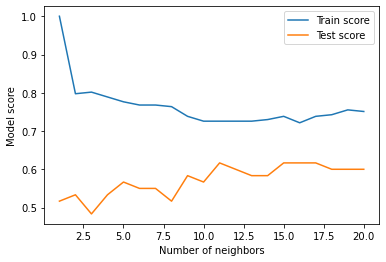

In [26]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();

print(f"Maximum KNN score on the test data :{max(test_scores)*100.:2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune
* LogisticRegression
* RandomForestRegressor
  
....using RandomizedSearchCV

In [27]:
#Create a Hyperparameter grid for LogisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

Now we've got hyperparameter grid for each of our model, lets tune them with RandomizedSearchCV

In [28]:
#Tune Logistic REgression

np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                           param_distributions=log_reg_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [30]:
rs_log_reg.score(x_test,y_test)

0.7333333333333333

Now we've tuned LogisticRegression ,Let's do the same for RandomForestClassifier

In [31]:
#Setup random seed
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

#Fit random hyperparameter search model for RandomForestClassifier 
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [32]:
#Let's find the best parameters for RandomisedSearchCV models
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [33]:
#Let's find the score for RandomizedSearchCV model
rs_rf.score(x_test,y_test)

0.7333333333333333

## Let's tune the Hyperparameters with GridSearchCV

Since both our models provide same results(accuracy) so far, Let's try improve both of our models with GridSearchCV

In [34]:
#Different hyperparameters for our LogisticRegresion model
log_reg_grid={"C":np.logspace(-4,4,40),
             "solver":["liblinear"]}

#Setup grid hyperparameter search for LogisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)

#Fit Grid hyperparameter search model
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.07029063e-01, 4.923882...652287e-01,
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [35]:
gs_log_reg.score(x_test,y_test)

0.7333333333333333

In [36]:
#Different hyperparameters for our RandomForestClassifier model
rf_grid = {"n_estimators":[61],
          "max_depth":[3],
          "min_samples_split":[10],
          "min_samples_leaf":[5]}

#Setup Grid hyperparameter search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(n_jobs=-1,
                                           random_state=42),
                    param_grid=rf_grid,
                    cv=3,
                    verbose=True)

#Fit Grid hyperparameter search model
gs_rf.fit(x_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [3], 'min_samples_leaf': [5],
                         'min_samples_split': [10], 'n_estimators': [61]},
             verbose=True)

In [37]:
gs_rf.score(x_test,y_test)

0.8

In [38]:
gs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 61}

### Since our RandomForestClassifier model has more accuracy than our LogisticRegression model ,We use RandomForestClassifier model hence forth

# Evaluating our tuned machine learning classfier beyond accuracy
* ROC curve and AUC score
* Confusion matrix 
* Classification report
* Precision
* Recall
* F1 Score

....and it would be great if cross-validation was used where possible

To make comparisions and evaluate our trained model ,we need to first make predictions

In [39]:
#To make predictioins with tuned model
y_preds=gs_rf.predict(x_test)

/home/sai_sharan/Desktop/heart-disease-project/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


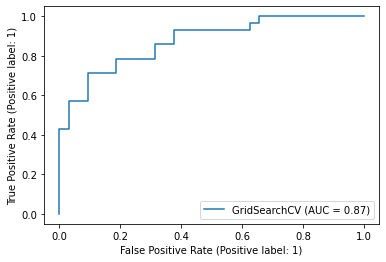

In [40]:
#Plot ROC curve and caculate AUC metric
plot_roc_curve(gs_rf,x_test,y_test);

In [41]:
#confusion matrix
print(confusion_matrix(y_test,y_preds))

[[26  6]
 [ 6 22]]


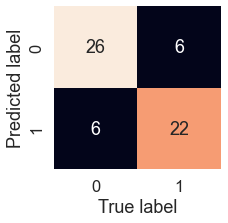

In [42]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,Y_preds):
    """
    Plot a nice looking confusion matrix using seaborn heatmap
    
    """
fig,ax=plt.subplots(figsize=(3,3))
ax=sns.heatmap(confusion_matrix(y_test,y_preds),
              annot=True,
              cbar=False)

plt.xlabel("True label")
plt.ylabel("Predicted label")

plot_conf_mat(y_test,y_preds)

Now we've got a ROC curve,an AUC metric and a Confusion matrix,Let's get a classification report and a cross-validated precision,recall and F1 score

In [43]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.79      0.79      0.79        28

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



## Calculate evaluation metrics using cross-validation

We're going to calculate precision,recall nd f1 score of our model using cross-validation and to do so we'll be using 'cross_val_score()'.

In [44]:
#Check best hyperparameters
gs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 61}

In [45]:
#Create a new classifier with best parameters
clf = RandomForestClassifier(max_depth =3,
                             min_samples_leaf=5,
                             min_samples_split= 10,
                             n_estimators=61)

In [46]:
#Cross-validated accuracy
cv_acc = cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.771412429378531

In [47]:
#Cross validated Precision
cv_precision = cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring='precision')
cv_precision = np.mean(cv_precision  )
cv_precision

0.8253986972147349

In [48]:
#Cross validated Recall
cv_recall = cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.7412698412698412

In [49]:
#Cross validated F1 score
cv_f1 = cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.7585318265237129

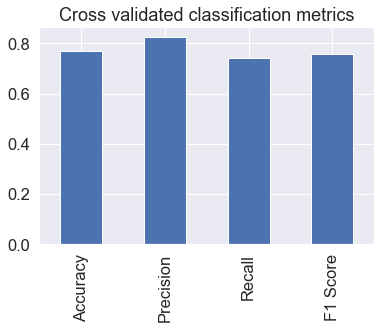

In [50]:
#Visualise cross validation metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                         "Precision":cv_precision,
                         "Recall":cv_recall,
                         "F1 Score":cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross validated classification metrics",
                     legend =False);

## Feature importance

Feature importance is another way of asking ,"which features contributed most to the outcomes of the model and how did they contribute?". 

Finding feature importance is different for each machine learning model.One way to find feature importance is by searching "(MODEL NAME) Feature importance"

Let's find feature importance for our RandomForestClassifier model

We find feature importance based on feature permutation because ,Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

High-cardinality means the feature has many unique values,hence impurity based feature importance may be misleading in such cases.

In [51]:
import time
from sklearn.inspection import permutation_importance
start_time = time.time()
clf.fit(x_test,y_test)
result = permutation_importance(clf,x_test,y_test,n_repeats=10,random_state=42,n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
feature_names=list(x_train.columns.values)
clf_importances = pd.Series(result.importances_mean,index=feature_names)

Elapsed time to compute the importances: 2.525 seconds


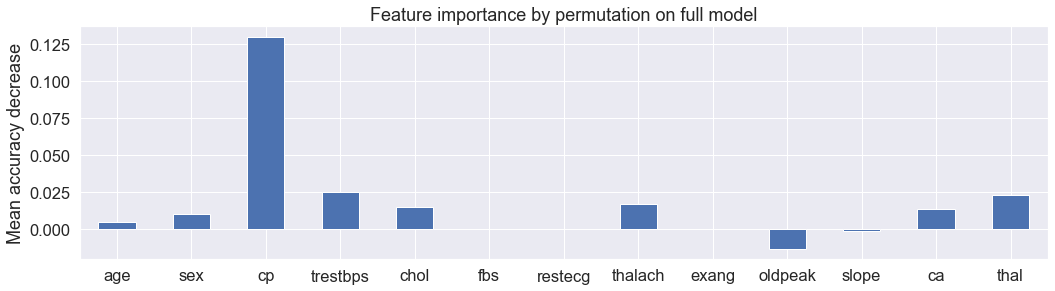

In [52]:
#Let's plot the importance of each feature in our dataset
fig,ax=plt.subplots(figsize=(15,5))
clf_importances.T.plot.bar(result.importances_std,ax=ax)
plt.title("Feature importance by permutation on full model")
plt.ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.xticks(rotation=0);

#### Above figure shows us how much each feature in our dataset contibutes to the prediction of the result of our machine learning model some are in positives and some are in negatives. What we can do basically is try to improve the features that contribute more to the model's prediction (like cp and ca) while collect future datas and try to ignore those features that dosen't really help our model in predicting the result (like sex,restecg ) 

In [53]:
gs_rf.score(x_test,y_test)

0.8

In [201]:
#Since we didnt reach our expected accuracy in the evaluation stage,Let's try another model 
import sys
!conda install --yes --prefix {sys.prefix} catboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/sai_sharan/Desktop/heart-disease-project/env

  added / updated specs:
    - catboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    catboost-0.26.1            |   py39h06a4308_0        29.4 MB
    certifi-2022.6.15          |   py39h06a4308_0         153 KB
    openssl-1.1.1p             |       h5eee18b_0         2.5 MB
    ------------------------------------------------------------
                                           Total:        32.1 MB

The following NEW packages will be INSTALLED:

  catboost           pkgs/main/linux-64::catboost-0.26.1-py39h06a4308_0

The following packages will be UPDATED:

  certifi            

In [5]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(random_seed=42)

In [6]:
model.fit(x_train,y_train)

Learning rate set to 0.005571
0:	learn: 0.6879741	total: 134ms	remaining: 2m 13s
1:	learn: 0.6828540	total: 140ms	remaining: 1m 9s
2:	learn: 0.6780608	total: 147ms	remaining: 49s
3:	learn: 0.6740038	total: 155ms	remaining: 38.6s
4:	learn: 0.6690714	total: 160ms	remaining: 31.8s
5:	learn: 0.6651743	total: 163ms	remaining: 27s
6:	learn: 0.6604451	total: 166ms	remaining: 23.6s
7:	learn: 0.6561873	total: 170ms	remaining: 21.1s
8:	learn: 0.6519018	total: 175ms	remaining: 19.3s
9:	learn: 0.6479552	total: 181ms	remaining: 17.9s
10:	learn: 0.6446314	total: 186ms	remaining: 16.7s
11:	learn: 0.6401227	total: 191ms	remaining: 15.7s
12:	learn: 0.6372407	total: 194ms	remaining: 14.8s
13:	learn: 0.6347323	total: 206ms	remaining: 14.5s
14:	learn: 0.6310704	total: 212ms	remaining: 13.9s
15:	learn: 0.6279774	total: 216ms	remaining: 13.3s
16:	learn: 0.6247037	total: 219ms	remaining: 12.7s
17:	learn: 0.6203897	total: 224ms	remaining: 12.2s
18:	learn: 0.6164687	total: 227ms	remaining: 11.7s
19:	learn: 0.6

305:	learn: 0.2271502	total: 690ms	remaining: 1.56s
306:	learn: 0.2264904	total: 692ms	remaining: 1.56s
307:	learn: 0.2259887	total: 693ms	remaining: 1.56s
308:	learn: 0.2256029	total: 694ms	remaining: 1.55s
309:	learn: 0.2252983	total: 696ms	remaining: 1.55s
310:	learn: 0.2246917	total: 697ms	remaining: 1.54s
311:	learn: 0.2242863	total: 698ms	remaining: 1.54s
312:	learn: 0.2239097	total: 700ms	remaining: 1.53s
313:	learn: 0.2230984	total: 701ms	remaining: 1.53s
314:	learn: 0.2227661	total: 702ms	remaining: 1.53s
315:	learn: 0.2220823	total: 704ms	remaining: 1.52s
316:	learn: 0.2218296	total: 705ms	remaining: 1.52s
317:	learn: 0.2214329	total: 706ms	remaining: 1.51s
318:	learn: 0.2207937	total: 708ms	remaining: 1.51s
319:	learn: 0.2206715	total: 708ms	remaining: 1.5s
320:	learn: 0.2203360	total: 710ms	remaining: 1.5s
321:	learn: 0.2198787	total: 711ms	remaining: 1.5s
322:	learn: 0.2194773	total: 713ms	remaining: 1.49s
323:	learn: 0.2189427	total: 714ms	remaining: 1.49s
324:	learn: 0.2

604:	learn: 0.1370516	total: 1.05s	remaining: 686ms
605:	learn: 0.1368434	total: 1.05s	remaining: 684ms
606:	learn: 0.1366303	total: 1.05s	remaining: 682ms
607:	learn: 0.1364778	total: 1.05s	remaining: 681ms
608:	learn: 0.1362189	total: 1.06s	remaining: 679ms
609:	learn: 0.1360325	total: 1.06s	remaining: 677ms
610:	learn: 0.1358415	total: 1.06s	remaining: 675ms
611:	learn: 0.1357145	total: 1.06s	remaining: 673ms
612:	learn: 0.1355270	total: 1.06s	remaining: 671ms
613:	learn: 0.1354108	total: 1.06s	remaining: 669ms
614:	learn: 0.1352427	total: 1.06s	remaining: 667ms
615:	learn: 0.1350732	total: 1.07s	remaining: 665ms
616:	learn: 0.1348198	total: 1.07s	remaining: 663ms
617:	learn: 0.1347185	total: 1.07s	remaining: 661ms
618:	learn: 0.1345141	total: 1.07s	remaining: 659ms
619:	learn: 0.1343810	total: 1.07s	remaining: 657ms
620:	learn: 0.1342470	total: 1.07s	remaining: 655ms
621:	learn: 0.1339934	total: 1.07s	remaining: 653ms
622:	learn: 0.1337190	total: 1.07s	remaining: 651ms
623:	learn: 

915:	learn: 0.0911684	total: 1.41s	remaining: 129ms
916:	learn: 0.0910737	total: 1.41s	remaining: 128ms
917:	learn: 0.0909668	total: 1.41s	remaining: 126ms
918:	learn: 0.0908507	total: 1.42s	remaining: 125ms
919:	learn: 0.0907448	total: 1.42s	remaining: 123ms
920:	learn: 0.0905628	total: 1.42s	remaining: 122ms
921:	learn: 0.0904881	total: 1.42s	remaining: 120ms
922:	learn: 0.0903457	total: 1.42s	remaining: 118ms
923:	learn: 0.0902560	total: 1.42s	remaining: 117ms
924:	learn: 0.0901460	total: 1.42s	remaining: 115ms
925:	learn: 0.0900855	total: 1.42s	remaining: 114ms
926:	learn: 0.0900167	total: 1.43s	remaining: 112ms
927:	learn: 0.0899072	total: 1.43s	remaining: 111ms
928:	learn: 0.0897467	total: 1.43s	remaining: 109ms
929:	learn: 0.0896661	total: 1.43s	remaining: 108ms
930:	learn: 0.0896218	total: 1.43s	remaining: 106ms
931:	learn: 0.0894957	total: 1.43s	remaining: 104ms
932:	learn: 0.0893929	total: 1.43s	remaining: 103ms
933:	learn: 0.0893252	total: 1.43s	remaining: 101ms
934:	learn: 

In [7]:
model.score(x_test,y_test)

0.7666666666666667

In [127]:
#Let's tune the model and find its accuracy
tuned_model = CatBoostClassifier(
    loss_function="Logloss",
    per_float_feature_quantization='2:border_count=1024',
    eval_metric="Accuracy",
    max_depth=1,
    learning_rate=0.1,
    iterations=100,
    od_wait = 100
)

tuned_model.fit(x_train,y_train,
               verbose=50,
               eval_set=(x_test,y_test),
               use_best_model=True,
               plot=True);


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7679325	test: 0.6500000	best: 0.6500000 (0)	total: 367us	remaining: 36.4ms
50:	learn: 0.8734177	test: 0.8000000	best: 0.8500000 (20)	total: 14.6ms	remaining: 14ms
99:	learn: 0.8902954	test: 0.8000000	best: 0.8500000 (20)	total: 23.5ms	remaining: 0us

bestTest = 0.85
bestIteration = 20

Shrink model to first 21 iterations.


#### As we can see above the besttest is 83.33% accuracy ,since our catboost model has 3% more accuracy than our RadomForestClassifier model lets consider this model and evaluate it further 

In [93]:
#lets find it AUC score
tuned_model = CatBoostClassifier(
    loss_function="Logloss",
    per_float_feature_quantization='2:border_count=1024',
    eval_metric="AUC",
    max_depth=1,
    learning_rate=0.1,
    iterations=100,
    od_wait = 100
)

tuned_model.fit(x_train,y_train,
               verbose=50,
               eval_set=(x_test,y_test),
               use_best_model=True,
               plot=True);


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6428571	best: 0.6428571 (0)	total: 337us	remaining: 33.5ms
50:	test: 0.8783482	best: 0.8922991 (23)	total: 13.2ms	remaining: 12.7ms
99:	test: 0.8582589	best: 0.8922991 (23)	total: 30.3ms	remaining: 0us

bestTest = 0.8922991071
bestIteration = 23

Shrink model to first 24 iterations.


In [114]:
#Let's find the model's Precision
tuned_model = CatBoostClassifier(
    loss_function="Logloss",
    per_float_feature_quantization='2:border_count=1024',
    eval_metric="Precision",
    max_depth=1,
    learning_rate=0.1,
    iterations=100,
    od_wait = 100
)

tuned_model.fit(x_train,y_train,
               verbose=50,
               eval_set=(x_test,y_test),
               use_best_model=True,
               plot=False);


0:	learn: 0.7934783	test: 0.6521739	best: 0.6521739 (0)	total: 299us	remaining: 29.6ms
50:	learn: 0.9072165	test: 0.7666667	best: 0.8461538 (13)	total: 11.2ms	remaining: 10.7ms
99:	learn: 0.9108911	test: 0.7666667	best: 0.8461538 (13)	total: 24.3ms	remaining: 0us

bestTest = 0.8461538462
bestIteration = 13

Shrink model to first 14 iterations.


In [113]:
#Let's find the models recall
tuned_model = CatBoostClassifier(
    loss_function="Logloss",
    per_float_feature_quantization='2:border_count=1024',
    eval_metric="Recall",
    max_depth=1,
    learning_rate=0.1,
    iterations=100,
    od_wait = 100
)

tuned_model.fit(x_train,y_train,
               verbose=50,
               eval_set=(x_test,y_test),
               use_best_model=True,
                plot=False);

0:	learn: 0.6697248	test: 0.5357143	best: 0.5357143 (0)	total: 336us	remaining: 33.3ms
50:	learn: 0.8073394	test: 0.8214286	best: 0.8571429 (20)	total: 11.2ms	remaining: 10.7ms
99:	learn: 0.8440367	test: 0.8214286	best: 0.8571429 (20)	total: 24.2ms	remaining: 0us

bestTest = 0.8571428571
bestIteration = 20

Shrink model to first 21 iterations.


In [91]:
#Let's find the models f1 score
tuned_model = CatBoostClassifier(
    loss_function="Logloss",
    per_float_feature_quantization='2:border_count=1024',
    eval_metric="F1",
    max_depth=1,
    learning_rate=0.1,
    iterations=100,
    od_wait = 100
)

tuned_model.fit(x_train,y_train,
               verbose=50,
               eval_set=(x_test,y_test),
               use_best_model=True,
               plot=False);


0:	learn: 0.7263682	test: 0.5882353	best: 0.5882353 (0)	total: 287us	remaining: 28.5ms
50:	learn: 0.8543689	test: 0.7931034	best: 0.8421053 (20)	total: 8.82ms	remaining: 8.47ms
99:	learn: 0.8761905	test: 0.7931034	best: 0.8421053 (20)	total: 17.1ms	remaining: 0us

bestTest = 0.8421052632
bestIteration = 20

Shrink model to first 21 iterations.


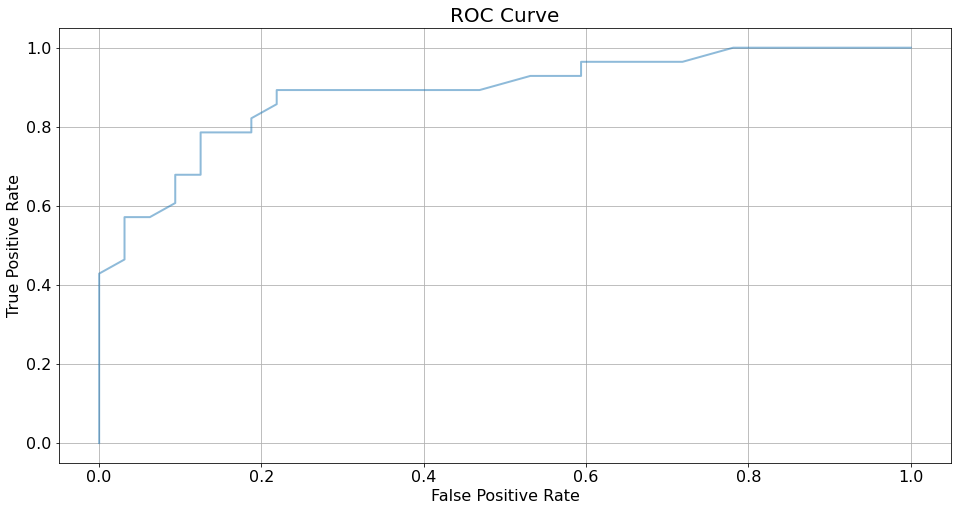

In [124]:
from catboost.utils import get_confusion_matrix,get_roc_curve
from catboost import Pool
from sklearn.metrics import roc_auc_score,accuracy_score
predictions=Pool(x_test,y_test)
get_roc_curve(tuned_model,predictions,plot=True);

In [130]:
import pickle
pickle.dump(tuned_model,open("tuned-catboost-model.pkl","wb"))
